In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
synthetic_data = pd.read_csv('best_X_weighted_distr.csv')

In [58]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)
synthetic_data = synthetic_data.drop('Unnamed: 0', axis=1)

# Feature Engineering
## Creating new features that have physically meanningful definitions
dfRagg = xm*N^(1.0/3)
Rf_f = alog(abs((complex(nr, alog(3.4*ni))^2 - 1)/(complex(0.6*nr, alog10(1.78*ni))^2 + 2)))

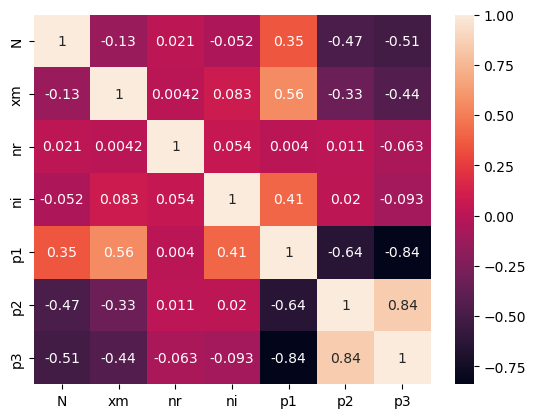

In [7]:
g= sns.heatmap(df_train.corr(), annot=True)

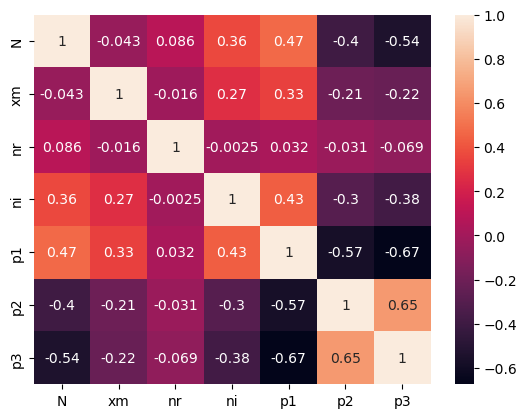

In [8]:
g= sns.heatmap(synthetic_data.corr(), annot=True)

In [45]:
# Now combine df_train with sythethic data
df = pd.concat([df_train, synthetic_data])

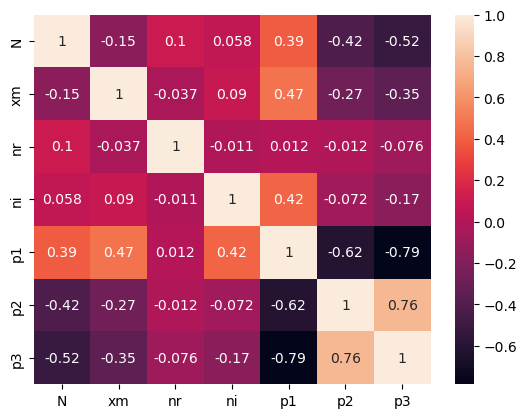

In [46]:
g= sns.heatmap(df.corr(), annot=True)

In [47]:
# df_augmented.to_csv('df_augmented.csv')

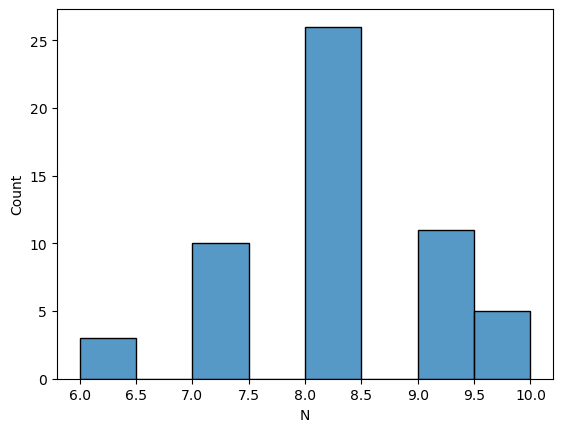

In [38]:
g = sns.histplot(df_test.N)

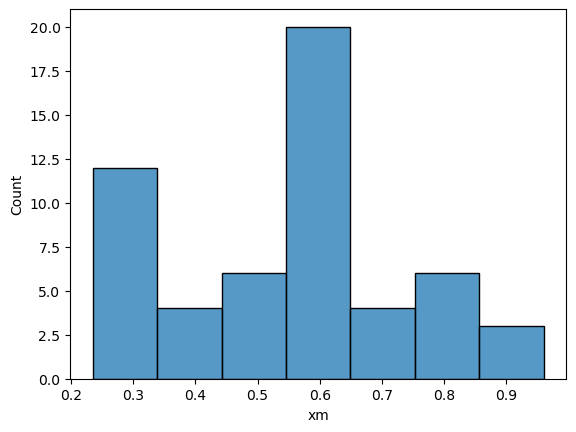

In [39]:
g = sns.histplot(df_test.xm)

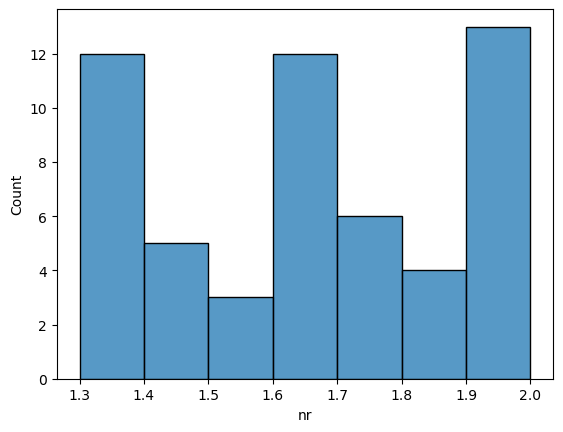

In [40]:
g = sns.histplot(df_test.nr)

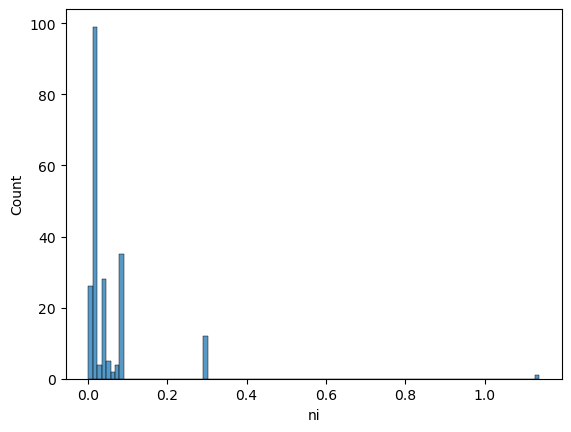

In [30]:
g = sns.histplot(df_train.ni)

In [48]:
df_train.query('ni > 0.3')

,N,xm,nr,ni,p1,p2,p3


In [49]:
df.query('ni > 0.3')

,N,xm,nr,ni,p1,p2,p3


The above run is an outlier. We neither need any run with ni > 0.3 let alone ni > 1, or it makes sense

In [50]:
df_train = df_train.query('ni < 1')
df = df.query('ni < 1')

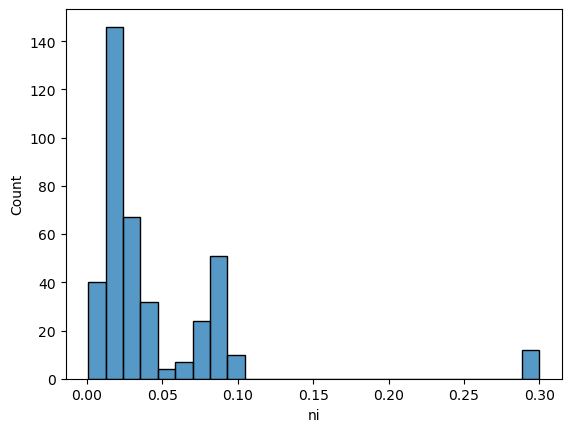

In [51]:
g = sns.histplot(df.ni)

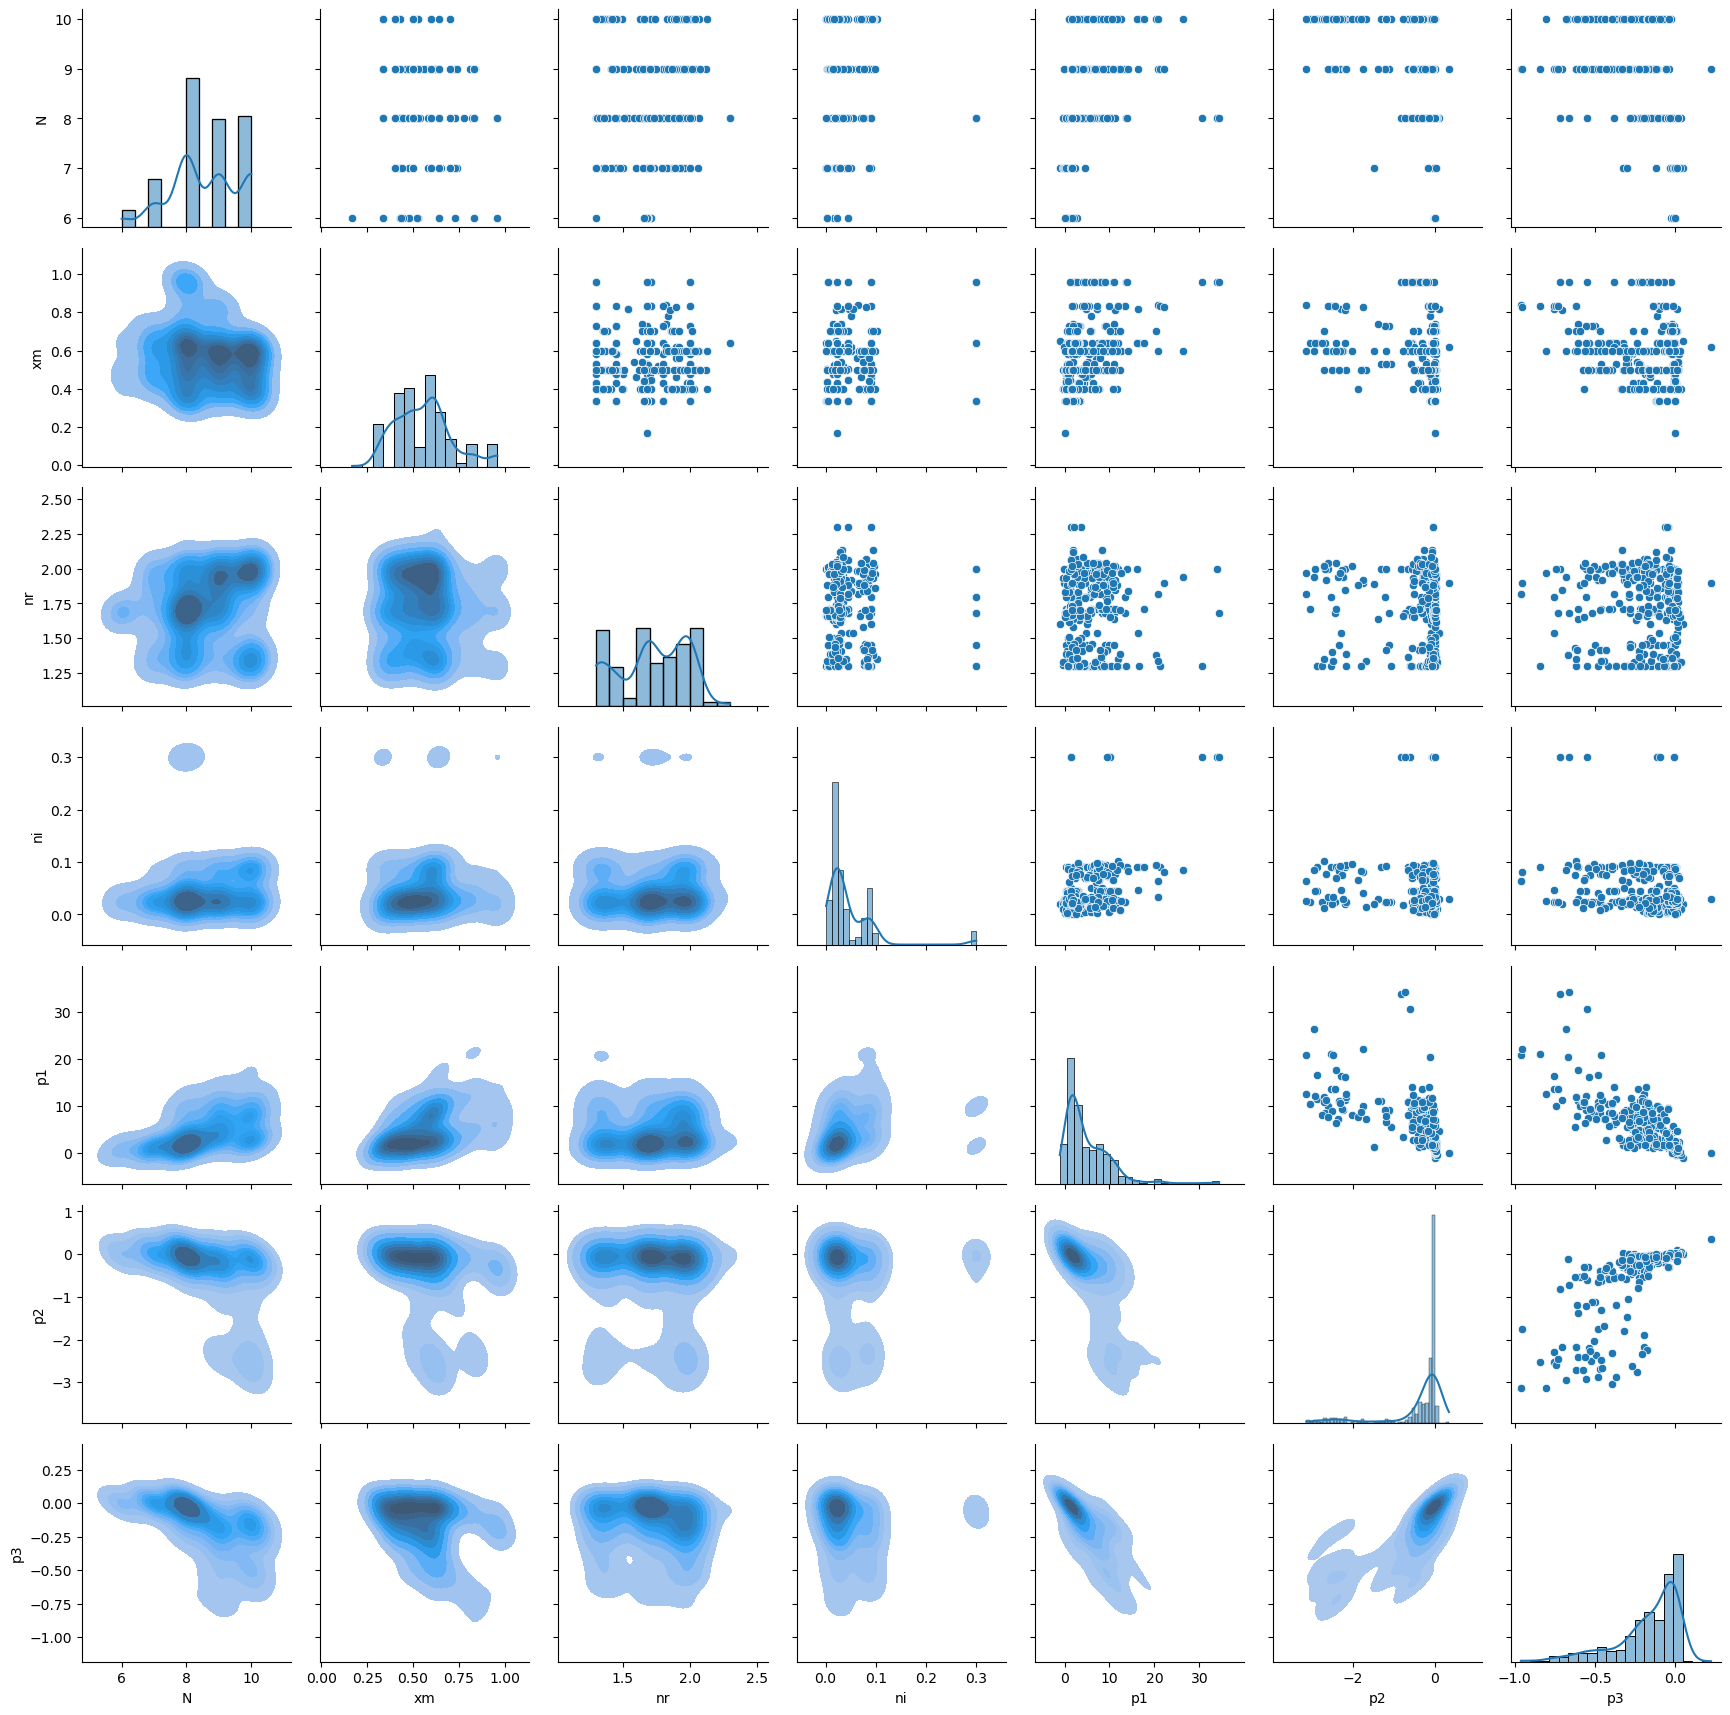

In [56]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [218]:
from bhmie import *

data = pd.read_csv('allregimes.csv')

def calc_tau(N, xm, nr, ni):
    N = 2**N
    s1,s2,qext,qsca,qback,gsca = bhmie(xm,complex(nr, ni),91)
    csca_mon = qsca * np.pi * xm**2
    cext_mon = qext * np.pi * xm**2
    cabs_mon = (qext - qsca) * np.pi * xm**2

    R1 = 1.598
    Rcut = 1. / 0.0001
    Df = 2.0
    Rmin=2.0
    #dstep = 1/(8*xm)
    ds = 1/(8*xm)
    Rmax = R1*(N*np.log(Rcut))**(1.0/Df)
    nstep = int((Rmax - Rmin) /ds)
    nstep = np.where(nstep < 100, 100, nstep)
    dstep = (Rmax - Rmin)/(nstep-1)

    R0 = np.arange(nstep)*dstep + Rmin
    dist = R0 * xm
    nc = ((1.0 - np.exp(-(R0/R1)**(Df) /N))*(1.0 - np.exp(-(R0/3.478)**3.194)) + (2.0/N) )/(1 + (2.0/N))
    #nc=1.0 - np.exp(-(R0/R1)**(Df) /N)
    f0 = np.zeros(nstep)
    f0[0] = 0.5 * (nc[1]-nc[0]) + nc[0] # this seems to include nc[0] erronously
    #f0[0] = 0.5 * (nc[1]-nc[0])
    f0[nstep-1] =  1. - nc[nstep-1] + 0.5 * (nc[nstep-1]-nc[nstep-2])
    #f0[nstep-1] = 0.5 * (nc[nstep-1]-nc[nstep-2]) #
    f0[1:(nstep-1)] =  (nc[2:(nstep)] - nc[0:(nstep-2)])/(2)
    tau_coef = np.sum(f0 / dist**2) / 4. / np.pi * (N-1)
    taue_out = tau_coef * cext_mon
    taus_out = tau_coef * csca_mon
    taua_out = tau_coef * cabs_mon
    return taus_out, taua_out


In [168]:
xm=0.6
nr=2.
ni=0.02
s1,s2,qext,qsca,qback,gsca = bhmie(xm,complex(nr, ni),91)
csca_mon = qsca * np.pi * xm**2
cext_mon = qext * np.pi * xm**2
cabs_mon = (qext - qsca) * np.pi * xm**2
print(csca_mon, cext_mon, cabs_mon)

0.11046093242742692 0.13615132736202512 0.0256903949345982


In [169]:
calc_tau(512, 0.6, 2., 0.02)

(0.5725771568993926,
 0.07795713992902682,
 0.014709733291274793,
 0.06324740663775202)

In [202]:
tau_new = data.apply(lambda row: pd.Series(calc_tau(row['N'], row['xm'], row['nr'], row['ni'])), axis=1).values
taus_out = tau_new[:,0]
taua_out = tau_new[:,1]

In [200]:
tau_new.shape

(271, 2)

In [173]:
tau_old = data['taua_out'].values

<AxesSubplot:>

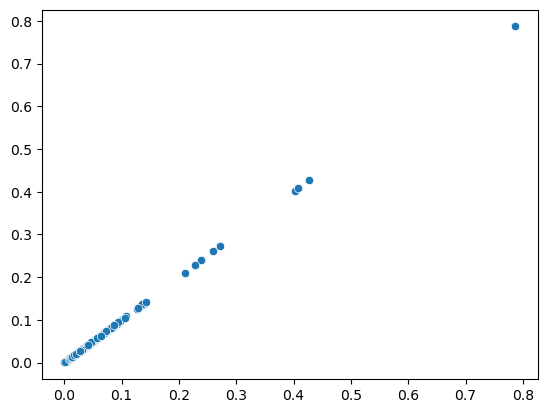

In [203]:
sns.scatterplot(x=tau_old, y=taua_out)

In [179]:
df.apply(lambda row: calc_tau(row['N'], row['xm'], row['nr'], row['ni']), axis=1)

0        (0.012465739490364829, 0.010935492163447243)
1      (0.00025177986263851584, 0.003917834111761114)
2       (0.0022753386921421765, 0.005798091446491413)
3       (0.0008278149900581272, 0.004644025644227839)
4       (0.0076854437814976055, 0.004473776924354794)
                            ...                      
388     (0.0031354709507852418, 0.008892039091804345)
389      (0.016060148319165978, 0.018434651197197945)
390     (0.005435508843972223, 0.0047939860747274275)
391     (0.003744776067143966, 0.0027409596086630543)
392     (0.002969783948313603, 0.0020654475361126193)
Length: 393, dtype: object

In [219]:
tau_new = df.apply(lambda row: pd.Series(calc_tau(row['N'], row['xm'], row['nr'], row['ni'])), axis=1).values
taus_out = tau_new[:,0]
taua_out = tau_new[:,1]
df[['taus_out', 'taua_out']] = tau_new

In [214]:
data

,Unnamed: 0,N,xm,nr,ni,taus_out,taua_out,qs_tm,qs_pm,m0,p1,p2,p3,Rf,xm_m0,N_m0,N_xm
0,0,1024,0.336,1.30,0.001,0.000843,0.000574,0.245158,0.189306,0.186993,1.862510,-0.094391,-0.100302,1.672859,0.062830,9.574038,344.064
1,1,1024,0.336,1.30,0.004,0.000844,0.002296,0.244536,0.190233,0.187009,1.920963,-0.094644,-0.101012,1.682642,0.062835,9.574853,344.064
2,2,1024,0.336,1.30,0.023,0.000848,0.013196,0.242294,0.197810,0.187552,2.235463,-0.096444,-0.104801,1.356002,0.063018,9.602675,344.064
3,3,1024,0.336,1.30,0.045,0.000862,0.025804,0.242021,0.210323,0.189129,2.619269,-0.098279,-0.109489,0.935703,0.063547,9.683390,344.064
4,4,1024,0.336,1.30,0.090,0.000919,0.051565,0.249216,0.246082,0.195410,3.382607,-0.102374,-0.118739,0.303425,0.065658,10.005003,344.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,266,64,0.730,1.68,0.023,0.049359,0.017317,2.114412,2.202473,0.378126,1.036369,-0.001042,-0.006648,1.178237,0.276032,1.210003,46.720
267,267,64,0.832,1.68,0.023,0.082770,0.021213,2.850684,3.180203,0.378126,1.672896,-0.002319,-0.013195,1.178237,0.314601,1.210003,53.248
268,268,64,0.832,1.71,0.045,0.089093,0.041006,2.940252,3.325695,0.391559,2.177705,-0.002774,-0.015580,0.820393,0.325777,1.252990,53.248
269,269,64,0.960,1.68,0.023,0.142400,0.026758,3.806748,4.587454,0.378126,2.685195,-0.006231,-0.027452,1.178237,0.363001,1.210003,61.440


In [222]:
df[['taus_out', 'taua_out']].describe()

,taus_out,taua_out
count,393.000000,393.000000
mean,0.041341,0.035974
std,0.059465,0.049086
min,0.000132,0.000460
25%,0.008728,0.012166
50%,0.021696,0.019131
75%,0.052220,0.042805
max,0.391702,0.426613


In [223]:
data[['taus_out', 'taua_out']].describe()

,taus_out,taua_out
count,271.000000,271.000000
mean,0.050376,0.042080
std,0.073085,0.072769
min,0.000132,0.000372
25%,0.006404,0.012150
50%,0.022240,0.022305
75%,0.064553,0.042004
max,0.391702,0.786715


In [224]:
df.reset_index(drop=True, inplace=True)
df.to_csv('df_augmented.csv')
# df_train.to_csv('df_train.csv')